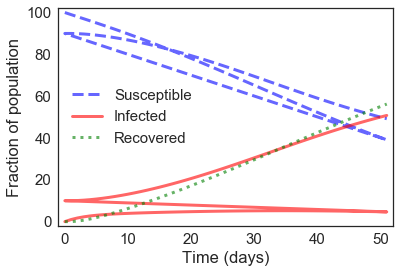

In [7]:
%matplotlib inline
from modsim import *

init = State(Sh=100, Ih=0, Rh=0, Sm=90, Im=10)

def make_system(t0=0, t_end=50):
    init = State(Sh=100, Ih=0, Rh=0, Sm=90, Im=10)
    
    return System(init=init, t0=t0, t_end=t_end)


def update(state, system, a, b, c):
    s1, i1, r1, s2, i2 = state
    
    a = a
    infected_h = (a*s1*i2)/(s1+i1+r1)
    
    b = b
    recovered = b*i1
    
    c = c
    infected_m = (c*i1*s2)/(s2+i2)
    
    s1 -= infected_h
    i1 += infected_h - recovered
    r1 += recovered
    s2 -= infected_m
    i2 += infected_m
    
    return State(Sh=s1, Ih=i1, Rh=r1, Sm=s2, Im=i2)


def run_simulation(system, update_func, a, b, c):
    Sh = TimeSeries()
    Ih = TimeSeries()
    Rh = TimeSeries()
    
    Sm = TimeSeries()
    Im = TimeSeries()
    
    state = system. init
    t0 = system.t0
    
    Sh[t0], Ih[t0], Rh[t0], Sm[t0], Im[t0] = state
    
    for t in linrange(system.t0, system.t_end):
        state = update_func(state, system, a, b, c)
        
        Sh[t+1], Ih[t+1], Rh[t+1], Sm[t+1], Im[t+1] = state
        
    system.Sh = Sh
    system.Ih = Ih
    system.Rh = Rh
    system.Sm = Sm
    system.Im = Im
    
def plot_results1(S, I, R):
    plot(S, '--', color='blue', label='Susceptible')
    plot(I, '-', color='red', label='Infected')
    plot(R, ':', color='green', label='Recovered')
    decorate(xlabel='Time (days)',
             ylabel='Fraction of population')
    
def plot_results2(S, I):
    plot(S, '--', color='blue', label='Susceptible')
    plot(I, '-', color='red', label='Infected')
    decorate(xlabel='Time (days)',
             ylabel='Fraction of population')



system = make_system()

run_simulation(system, update, 0.1, 0.25, 0.1)

plot_results1(system.Sh, system.Ih, system.Rh)

system = make_system()

run_simulation(system, update, 0.1, 0.1, 0.1)

plot_results2(system.Sm, system.Im)



def add_vaccine(system, fraction):

    system.init.Sh -= fraction
    system.init.Rh += fraction

    contact = 5
    recovery = 14

    beta = 1 / contact
    gamma = 1 / recovery

    system2 = make_system(beta, gamma)
    add_vaccine(system2, 0.2)
    #justusedarandomvaccinationratehere
    run_simulation(system2, update)


In [16]:
contact = 5
recovery = 14

beta = 1 / contact
gamma = 1 / recovery
    
vaccine_array = linrange(.1, .9, .05)
for fraction in vaccine_array: 
    system2 = make_system(beta, gamma)
    add_vaccine(system2, fraction)
    run_simulation(system2, update)

def calc_total_infected(state):
    return state.S[t0] - state.S[t_end]

total_infected = calc_total_infected(system2)
total_infected


RecursionError: maximum recursion depth exceeded in comparison

In [ ]:
def sweep_immunity(vaccine_array):
    sweep = SweepSeries()
    for fraction in vaccine_array:
        system2 = make_system(beta, gamma)
        add_vaccine(system2, fraction)
        run_simulation(system2, update)
    return sweep


In [ ]:
vaccine_array = linspace(.1, .9, .05)
infected_sweep = sweep_immunity(vaccine_array)
infected_sweep

plot(infected_sweep)

decorate(xlabel='Fraction vaccinated',
         ylabel='Total fraction infected',
         title='Fraction infected vs. vaccination rate',
         legend=False)
